Epoch 1/10


2023-08-10 00:17:17.150685: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 8s 10ms/step - loss: 2.1078 - accuracy: 0.2145 - val_loss: 1.8924 - val_accuracy: 0.3276
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.7798 - accuracy: 0.3612 - val_loss: 1.6659 - val_accuracy: 0.4039
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6246 - accuracy: 0.4182 - val_loss: 1.5923 - val_accuracy: 0.4311
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5489 - accuracy: 0.4457 - val_loss: 1.5027 - val_accuracy: 0.4630
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4941 - accuracy: 0.4649 - val_loss: 1.5200 - val_accuracy: 0.4540
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4479 - accuracy: 0.4808 - val_loss: 1.4428 - val_accuracy: 0.4823
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4044 - accuracy: 0.4970 - val_loss: 1.4099 - val_accuracy: 0.4922
Epoch 8/10
782/7

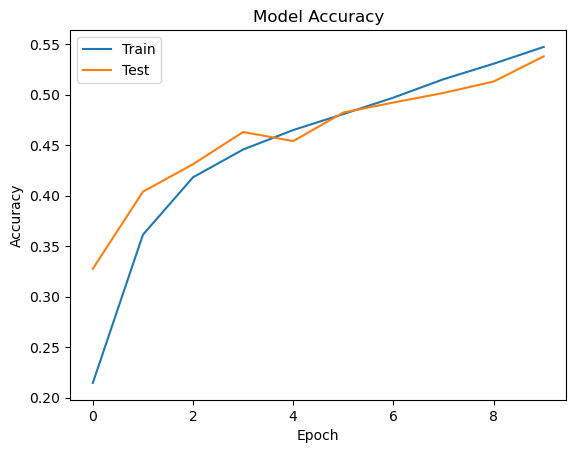

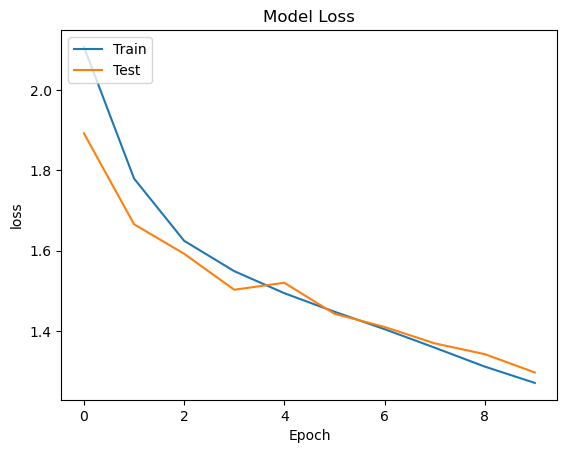

157/157 [==============================] - 1s 5ms/step - loss: 1.2965 - accuracy: 0.5379
Test accuracy: 0.5378999710083008


In [1]:
import tensorflow as tf
import tensorflow_datasets as tdf
import matplotlib.pyplot as py

(train_dataset,test_dataset),info=tdf.load('cifar10',split=['train','test'],with_info=True,as_supervised=True)
input_shape=info.features['image'].shape
num_classes=info.features['label'].num_classes

train_dataset=train_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).shuffle(1000).batch(64)
test_dataset=test_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).batch(64)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='sigmoid',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dense(num_classes,activation='softmax')

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

py.plot(history.history['accuracy'])
py.plot(history.history['val_accuracy'])
py.title('Model Accuracy')
py.xlabel('Epoch')
py.ylabel('Accuracy')
py.legend(['Train','Test'],loc='upper left')
py.show()

py.plot(history.history['loss'])
py.plot(history.history['val_loss'])
py.title('Model Loss')
py.xlabel('Epoch')
py.ylabel('loss')
py.legend(['Train','Test'],loc='upper left')
py.show()

test_loss,test_acc=model.evaluate(test_dataset)
print('Test accuracy:',test_acc)

